In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/TechAxis/house_price_regression_dataset.csv")
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.60,0,5,262382.85
1,4272,3,3,2016,4.75,1,6,985260.85
2,3592,1,2,2016,3.63,0,9,777977.39
3,966,1,2,1977,2.73,1,8,229698.92
4,4926,2,1,1993,4.70,0,8,1041740.86
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.17,2,10,701494.00
996,3179,1,2,1999,2.98,1,10,683723.16
997,2606,4,2,1962,4.06,0,2,572024.02
998,4723,5,2,1950,1.93,0,7,964865.30


In [ ]:
len(df)

1000

In [ ]:
df.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,2815.42,2.99,1.97,1986.55,2.78,1.02,5.62,618861.02
std,1255.51,1.43,0.82,20.63,1.30,0.81,2.89,253568.06
min,503.00,1.00,1.00,1950.00,0.51,0.00,1.00,111626.85
25%,1749.50,2.00,1.00,1969.00,1.67,0.00,3.00,401648.23
50%,2862.50,3.00,2.00,1986.00,2.81,1.00,6.00,628267.29
75%,3849.50,4.00,3.00,2004.25,3.92,2.00,8.00,827141.28
max,4999.00,5.00,3.00,2022.00,4.99,2.00,10.00,1108236.84


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


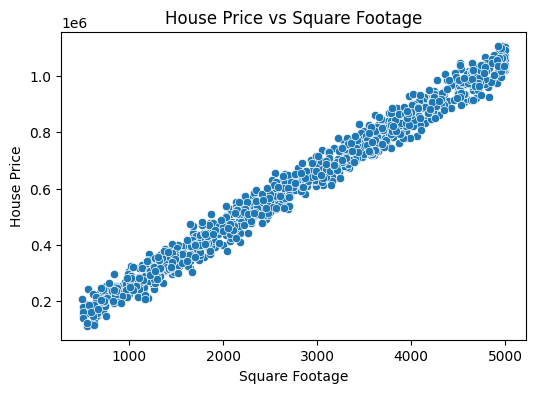

In [ ]:
plt.figure(figsize = (6, 4))
sns.scatterplot(x = "Square_Footage", y = "House_Price", data = df)
plt.title("House Price vs Square Footage")
plt.xlabel("Square Footage")
plt.ylabel("House Price")
plt.show()


In [ ]:
features = ["Square_Footage", "Num_Bedrooms", "Num_Bathrooms", "Neighborhood_Quality"]
target = ["House_Price"]

In [ ]:
X = df[features]
Y = df[target]

In [ ]:
X.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Neighborhood_Quality
0,1360,2,1,5
1,4272,3,3,6
2,3592,1,2,9
3,966,1,2,8
4,4926,2,1,8


In [ ]:
Y.head()

,House_Price
0,262382.85
1,985260.85
2,777977.39
3,229698.92
4,1041740.86


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42 )


In [ ]:
X_train, X_test, Y_train, Y_test

(     Square_Footage  Num_Bedrooms  Num_Bathrooms  Neighborhood_Quality
 29             2028             2              3                     2
 535            3519             5              3                    10
 695            4507             2              3                     7
 557            3371             4              2                     1
 836            2871             5              1                     6
 ..              ...           ...            ...                   ...
 106            2257             5              1                     2
 270            3894             3              2                     5
 860            1484             5              1                     6
 435            1865             4              2                     7
 102            1363             4              1                     1
 
 [800 rows x 4 columns],
      Square_Footage  Num_Bedrooms  Num_Bathrooms  Neighborhood_Quality
 521            4012             3   

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[ 850692.73518523],
       [ 507969.72302821],
       [ 990016.66378699],
       [1024636.3617407 ],
       [ 758128.33496546],
       [ 765814.39907001],
       [1004672.23281454],
       [ 902053.26993186],
       [ 795419.98979831],
       [ 887694.64278412],
       [ 759177.5033556 ],
       [ 661787.25079129],
       [ 189048.46096895],
       [1043471.41311128],
       [ 539333.10964216],
       [ 231258.63285756],
       [ 503113.74080257],
       [ 377792.43520068],
       [ 734497.96125026],
       [ 350965.9503227 ],
       [ 730039.9535535 ],
       [ 524020.22606902],
       [ 710346.0813737 ],
       [ 873485.01145599],
       [ 474055.36237583],
       [ 365147.42168712],
       [ 461990.52153507],
       [ 436590.45621133],
       [ 257119.48487646],
       [ 472494.8313808 ],
       [ 288911.71294056],
       [ 909298.9337847 ],
       [ 783974.5203565 ],
       [ 334165.19068894],
       [ 472625.99391096],
       [ 759773.53940048],
       [ 466636.11027   ],
 

In [ ]:
r2 = r2_score(Y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

R-squared (R2) Score: 0.9868491913757758


In [ ]:
mean_squared_error = mean_squared_error(Y_test, y_pred)
print(f"The mean squared error: {mean_squared_error}")

The mean squared error: 847686093.6770108


In [ ]:
years_to_predict = pd.DataFrame({"Square_Footage": [1400], "Num_Bedrooms": [3], "Num_Bathrooms": [2], "Neighborhood_Quality": [4]})
predicted_house_price = model.predict(years_to_predict)
print(f"The predicted house price: Rs.{predicted_house_price}")


The predicted house price: Rs.[[334195.26098484]]


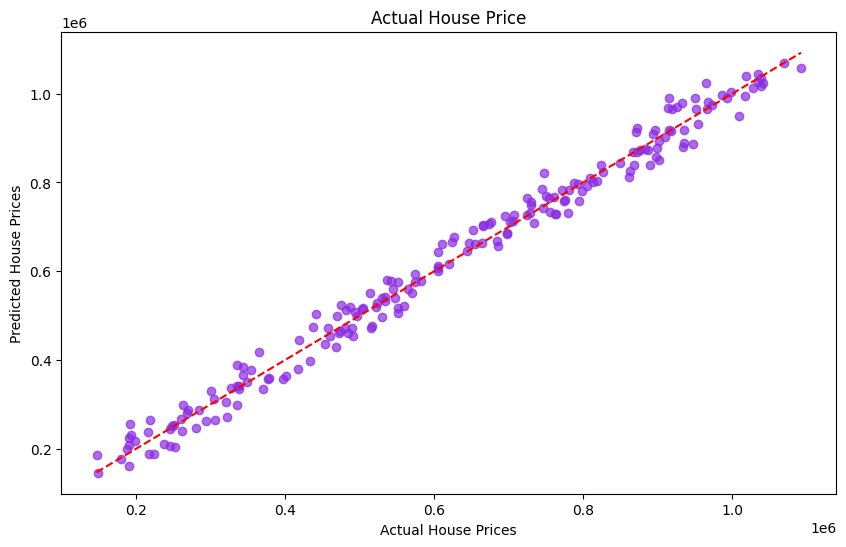

In [ ]:
plt.figure(figsize = (10, 6))
plt.scatter(Y_test, y_pred, alpha = 0.7, color = "blueviolet")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color = "red", linestyle = "--")
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual House Price")
plt.show()

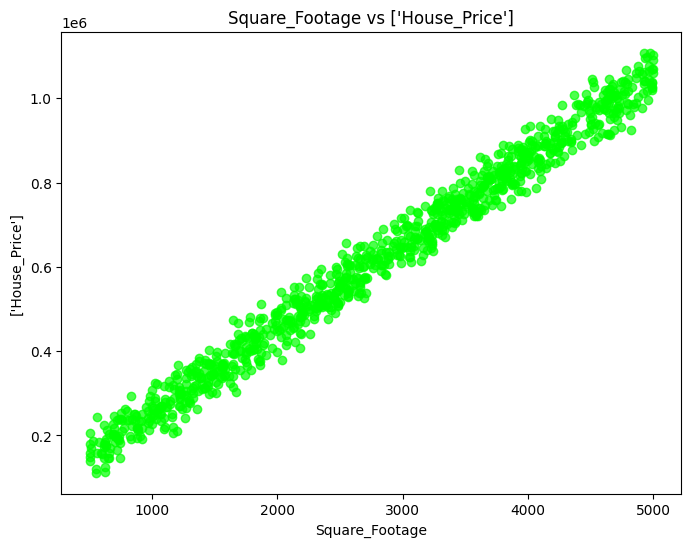

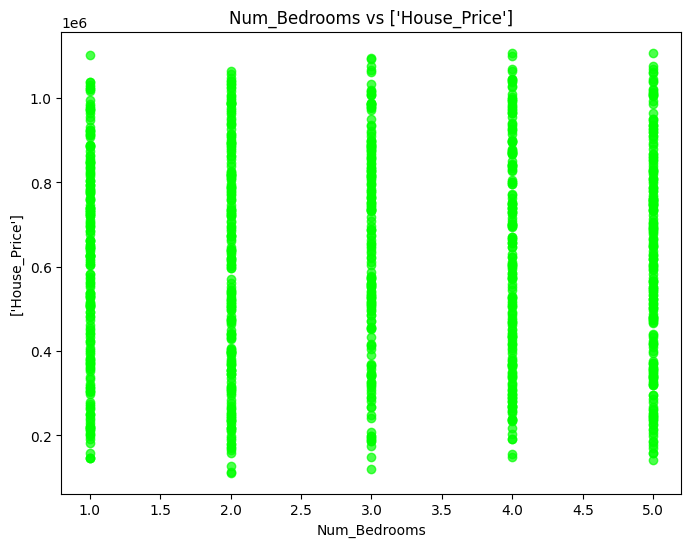

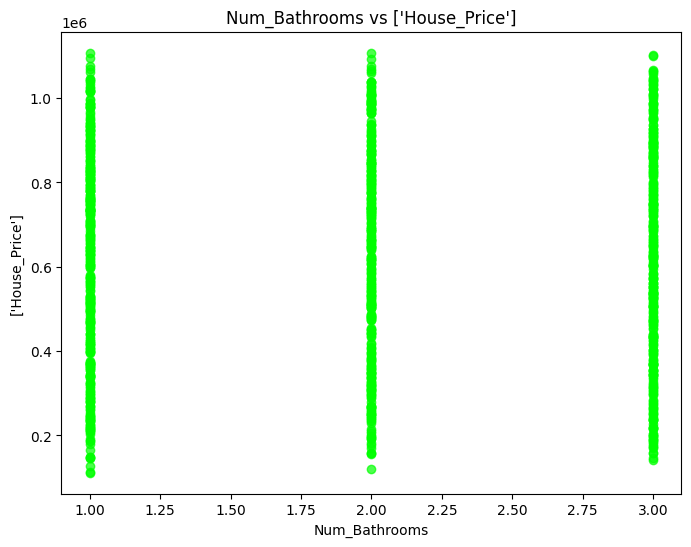

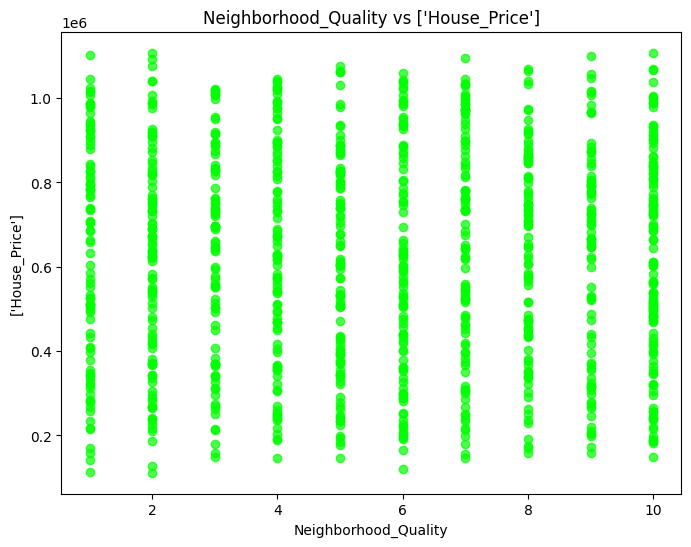

In [ ]:
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df[target], alpha=0.7, color="lime")
    plt.title(f"{feature} vs {target}")
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()